# Задание 1

In [46]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [60]:
X = pd.Series([69, 74, 68, 70, 72, 67, 66, 70, 76, 68, 72, 79, 74, 67, 66, 71, 74, 75, 75, 76])
Y = pd.Series([153, 175, 155, 135, 172, 150, 115, 137, 200, 130, 140, 265, 185, 112, 140,  150, 165, 185, 210, 220])

## Subtask A

In [62]:
pd.DataFrame({"X": X, "Y": Y}).describe().rename(index={"50%": "median"}).drop(["25%", "75%", "max", "min", "std"])

,X,Y
count,20.00,20.0
mean,71.45,164.7
median,71.50,154.0


In [63]:
pd.DataFrame({"X": X, "Y": Y}).mode()

,X,Y
0,74.0,140
1,NaN,150
2,NaN,185


## Subtask B

In [68]:
pd.DataFrame({"X": X, "Y": Y}).var()

X      14.576316
Y    1441.273684
dtype: float64

## Subtask C

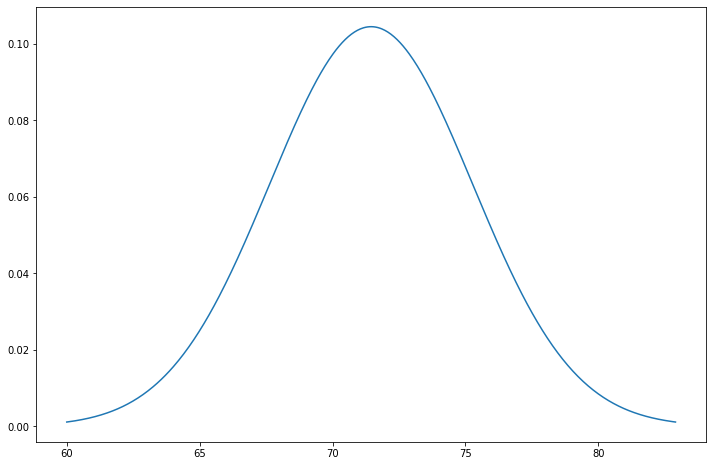

In [88]:
x_mean = X.mean()
x_std = X.std()

x_axis = np.linspace(x_mean - 3 * x_std, x_mean + 3 * x_std, 600)
y_axis = stats.norm(loc=x_mean, scale=x_std).pdf(x_axis)

_, axs = plt.subplots(figsize=(12, 8))
axs.plot(x_axis, y_axis)
plt.show()

## Subtask D

In [83]:
import scipy.integrate as integrate
greater_80 = integrate.quad(lambda x: stats.norm(loc=x_mean, scale=x_std).pdf(x), 80, 200)
greater_80[0]

0.012563181452947544

## Subtask E

In [84]:
pd.DataFrame({"X": X, "Y": Y}).mean()

X     71.45
Y    164.70
dtype: float64

In [86]:
pd.DataFrame({"X": X, "Y": Y}).cov()

,X,Y
X,14.576316,128.878947
Y,128.878947,1441.273684


## Subtask F

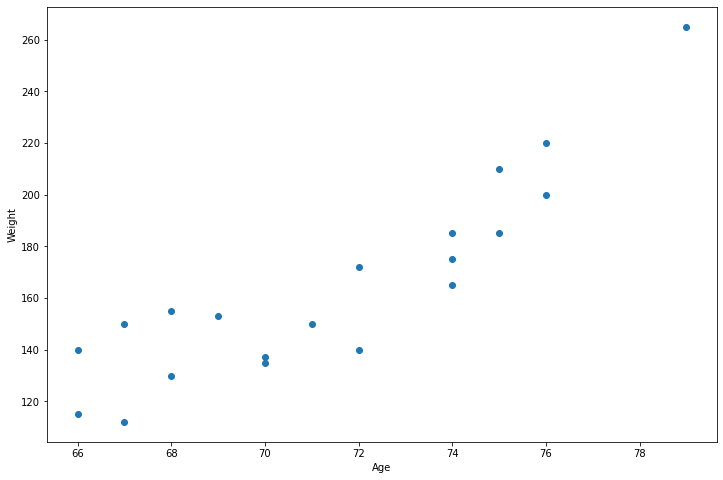

In [93]:
_, axs = plt.subplots(figsize=(12, 8))
axs.scatter(X, Y)
plt.xlabel("Age")
plt.ylabel("Weight")
plt.show()

# Задание 2

In [95]:
data = pd.DataFrame({
    "a": [17, 17, 12],
    "b": [11,  9, 13],
    "c": [11,  8, 19]
})
data.cov()

,a,b,c
a,8.333333,-5.0,-15.833333
b,-5.000000,4.0,11.000000
c,-15.833333,11.0,32.333333


In [96]:
np.linalg.det(data.to_numpy())

-114.99999999999991

# Задание 3

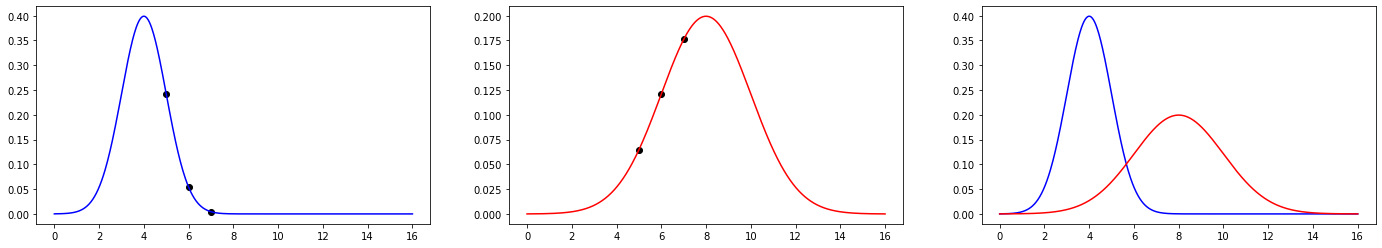

In [113]:
Na = stats.norm(loc=4, scale=1).pdf
Nb = stats.norm(loc=8, scale=2).pdf

x = np.linspace(0, 16, 600)
seeking = [5, 6, 7]

_, axs = plt.subplots(ncols=3, figsize=(24, 4))

axs[0].plot(x, Na(x), color="blue")
axs[0].scatter(seeking, Na(seeking), color="black")

axs[1].plot(x, Nb(x), color="red")
axs[1].scatter(seeking, Nb(seeking), color="black")

axs[2].plot(x, Na(x), color="blue")
axs[2].plot(x, Nb(x), color="red")

plt.show()

In [116]:
pd.DataFrame({
    "Na": Na(seeking),
    "Nb": Nb(seeking)
}, index=seeking)

,Na,Nb
5,0.241971,0.064759
6,0.053991,0.120985
7,0.004432,0.176033


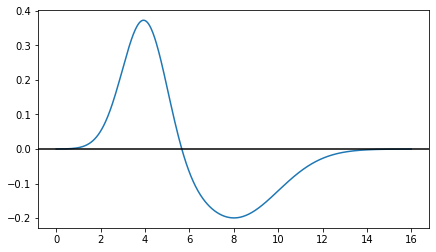

In [140]:
_, axs = plt.subplots(figsize=(7, 4))
diff = lambda x: Na(x) - Nb(x)
axs.plot(x, diff(x))
axs.axhline(y=0, color='black', linestyle='-')
plt.show()

In [134]:
from scipy import optimize
optimize.root(diff, [5, 7]).x[0]

5.6599096559037